Accuracy: 0.31


c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gabbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                  precision    recall  f1-score   support

down_by_elevator       0.00      0.00      0.00      3981
      going_down       0.00      0.00      0.00      6782
        going_up       0.00      0.00      0.00      7192
         running       0.00      0.00      0.00      5462
         sitting       0.00      0.00      0.00      3702
    sitting_down       0.00      0.00      0.00      1109
        standing       0.00      0.00      0.00     13731
     standing_up       0.00      0.00      0.00      1149
  up_by_elevator       0.00      0.00      0.00      6729
         walking       0.31      1.00      0.47     22432

        accuracy                           0.31     72269
       macro avg       0.03      0.10      0.05     72269
    weighted avg       0.10      0.31      0.15     72269



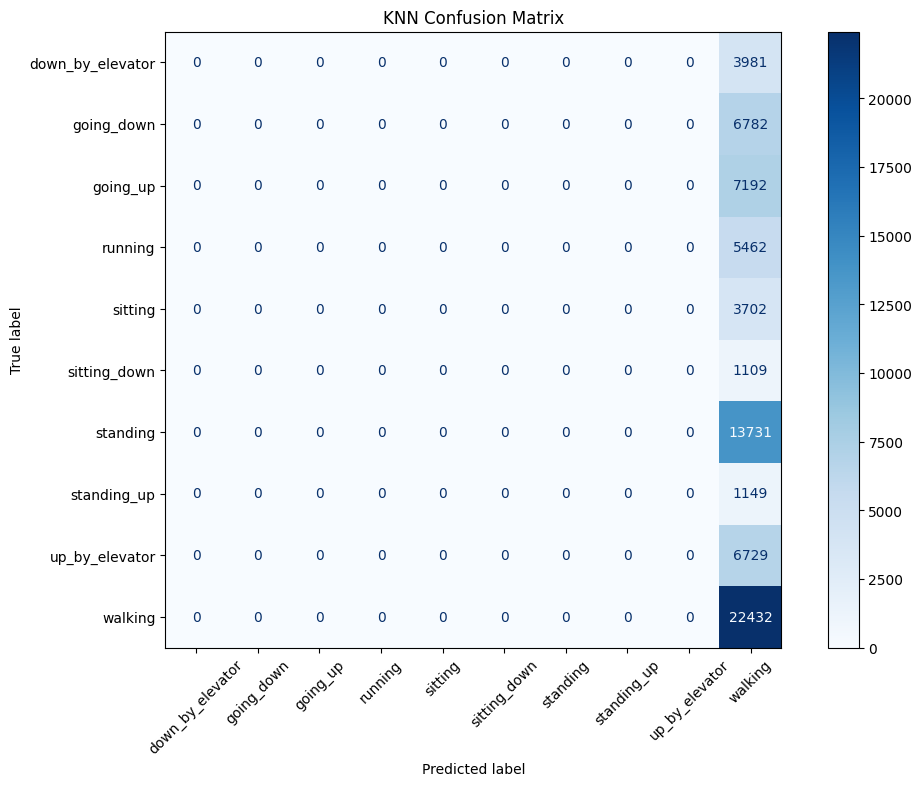

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./csv/database_complementary_filter.csv')

# seperando os atributos do alvo
X = df.drop(columns=['activity'])
y = df['activity']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naive bayes gaussiano
nb = GaussianNB()

# treino
nb.fit(X_train, y_train)

# previsão
y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
fig, ax = plt.subplots(figsize=(12, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)

plt.xticks(rotation=45)
plt.title('KNN Confusion Matrix')
plt.show()